In [150]:
import pandas as pd
from matplotlib import pyplot as plt

In [151]:
real_estate = pd.read_csv('real_estate.zip')

In [152]:
print(real_estate.columns)

Index(['List Year', 'Date Recorded', 'Town', 'Address', 'Assessed Value',
       'Sale Amount'],
      dtype='object')


In [153]:
from datetime import datetime
import numpy as np

sales = pd.DataFrame({'Date Recorded':real_estate['Date Recorded']})
sales = sales[sales['Date Recorded'].notna()]
sales['doy'] = sales['Date Recorded'].map(lambda x: datetime.strptime(str(x), '%m/%d/%Y').timetuple().tm_yday)
sales['year'] = sales['Date Recorded'].map(lambda x: datetime.strptime(str(x), '%m/%d/%Y').year)
sales['soldprice'] = real_estate['Sale Amount']
sales['asseseedvalue'] = real_estate['Assessed Value']
sales.to_csv('real_estate_sales.csv')

In [154]:
# salesgroup = sales.groupby(['year', 'doy']).size()
salesgroup = sales['doy']
# salesgroup.columns = ['doy', 'count']
years = sales['year'].unique().tolist()
years.sort()


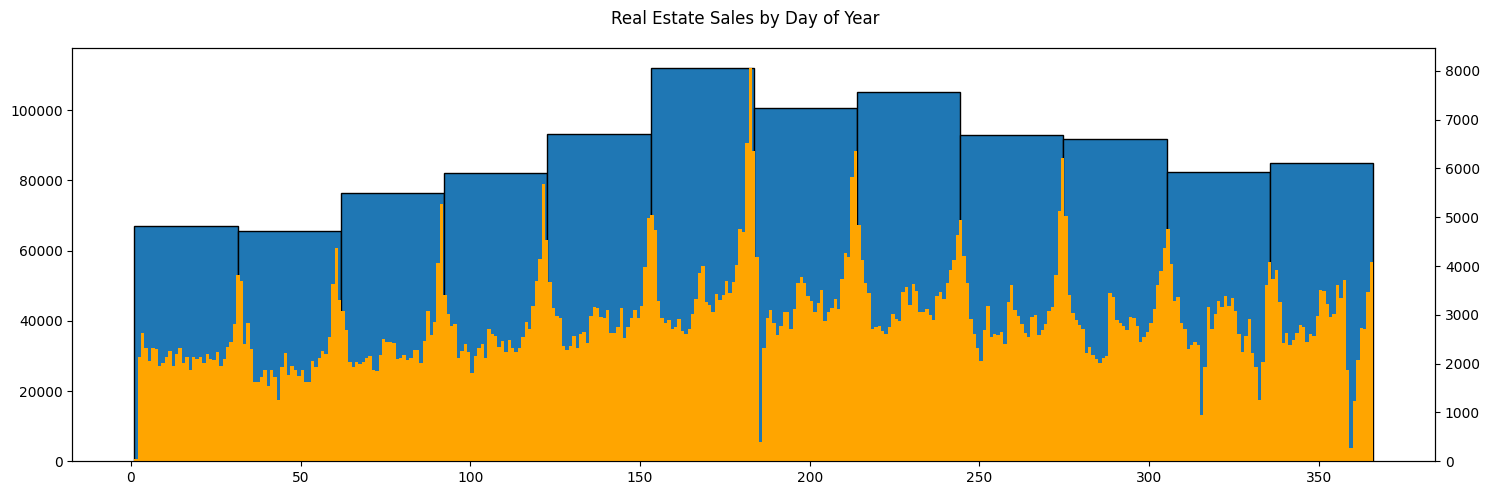

In [155]:
# bins=np.arange(1, 366, 1)
fig,ax = plt.subplots(1,1, sharey=False, tight_layout=True, figsize=(15, 5))
fig.suptitle('Real Estate Sales by Day of Year')
ax2 = ax.twinx()

a = ax.hist(list(salesgroup), bins=12, histtype='bar', ec='black')# density=True,  color='black', linewidth=2)#,histtype='step',)
b = ax2.hist(list(salesgroup), bins=365,color='orange')#, density=True, histtype='step', color='black', linewidth=2)